In [4]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
import numpy as np
import pandas as pd
from sklearn import *
import numpy as np
import pandas as pd
import sqlite3
from sklearn import *
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pandas as pd
df=pd.read_csv("apneaset.csv")
df

,Patinet_ID,EEG_Signal_Amplitude,EEG_Delta_band,EEG_Theta_band,EEG_Alpha_band,EEG_Beta_band,Hair_Phenotype,heart_rate,skin_conductance,skin_temperature,cortisol_level,Systolic_BP,Diastolic_BP,apnea_Severity
0,180203,56,2.4786,5.5748,11.7319,23.9909,Curly_hair,Medium_PulseRate,Normal_Conductance,Normal_Temperature,AverageCL,Range2_LowSystolic,NormalDiSystolic,Medium_Severity
1,152268,97,3.2531,6.4658,13.1411,28.3962,Curly_hair,High_PulseRate,Low_Conductance,Fever,Below_AverageCL,Range3_LowSystolic,LowDiSystolic,Low_Severity
2,157399,83,3.6325,6.0053,13.6766,26.0487,Wavy_hair,High_PulseRate,Low_Conductance,Fever,Below_AverageCL,Range3_LowSystolic,LowDiSystolic,Low_Severity
3,131849,58,2.9477,5.5462,10.3739,22.0865,Straight_hair,Medium_PulseRate,Normal_Conductance,Normal_Temperature,AverageCL,Range2_LowSystolic,NormalDiSystolic,Medium_Severity
4,164593,22,1.9366,4.3574,8.9079,18.7077,Curly_hair,Low_PulseRate,High_Conductance,Low_Temperature,Above_AverageCL,Range1_LowSystolic,VerylowDiSystolic,High_Severity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,134065,95,3.0788,6.7874,14.5136,26.9154,No_hair,High_PulseRate,Low_Conductance,Fever,Below_AverageCL,Range3_LowSystolic,LowDiSystolic,Medium_Severity
671,182597,23,1.2767,4.9695,8.8617,18.6980,No_hair,Low_PulseRate,High_Conductance,Low_Temperature,Above_AverageCL,Range1_LowSystolic,VerylowDiSystolic,High_Severity
672,156972,36,2.3799,5.3240,11.5026,23.6280,Wavy_hair,Medium_PulseRate,Normal_Conductance,Normal_Temperature,AverageCL,Range2_LowSystolic,NormalDiSystolic,Low_Severity
673,172428,59,2.6147,5.3841,11.1521,20.8031,Straight_hair,Medium_PulseRate,Normal_Conductance,Normal_Temperature,AverageCL,Range2_LowSystolic,NormalDiSystolic,Medium_Severity


In [6]:
df["apnea_Severity"] = df["apnea_Severity"].map(
    {'High_Severity': 2, 'Medium_Severity': 1, 'Low_Severity': 0})
df["heart_rate"] = df["heart_rate"].map(
    {'High_PulseRate': 2, 'Medium_PulseRate': 1, 'Low_PulseRate': 0})
df["skin_conductance"] = df["skin_conductance"].map(
    {'High_Conductance': 2, 'Normal_Conductance': 1, 'Low_Conductance': 0})
df["skin_temperature"] = df["skin_temperature"].map(
    {'Low_Temperature': 2, 'Normal_Temperature': 1, 'Fever': 0})
df["cortisol_level"] = df["cortisol_level"].map(
    {'Above_AverageCL': 2, 'AverageCL': 1, 'Below_AverageCL': 0})
df["Systolic_BP"] = df["Systolic_BP"].map(
    {'Range1_LowSystolic': 2, 'Range2_LowSystolic': 1, 'Range3_LowSystolic': 0})
df["Diastolic_BP"] = df["Diastolic_BP"].map(
    {'VerylowDiSystolic': 2, 'NormalDiSystolic': 1, 'LowDiSystolic': 0})

In [7]:
df

,Patinet_ID,EEG_Signal_Amplitude,EEG_Delta_band,EEG_Theta_band,EEG_Alpha_band,EEG_Beta_band,Hair_Phenotype,heart_rate,skin_conductance,skin_temperature,cortisol_level,Systolic_BP,Diastolic_BP,apnea_Severity
0,180203,56,2.4786,5.5748,11.7319,23.9909,Curly_hair,1,1,1,1,1,1,1
1,152268,97,3.2531,6.4658,13.1411,28.3962,Curly_hair,2,0,0,0,0,0,0
2,157399,83,3.6325,6.0053,13.6766,26.0487,Wavy_hair,2,0,0,0,0,0,0
3,131849,58,2.9477,5.5462,10.3739,22.0865,Straight_hair,1,1,1,1,1,1,1
4,164593,22,1.9366,4.3574,8.9079,18.7077,Curly_hair,0,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,134065,95,3.0788,6.7874,14.5136,26.9154,No_hair,2,0,0,0,0,0,1
671,182597,23,1.2767,4.9695,8.8617,18.6980,No_hair,0,2,2,2,2,2,2
672,156972,36,2.3799,5.3240,11.5026,23.6280,Wavy_hair,1,1,1,1,1,1,0
673,172428,59,2.6147,5.3841,11.1521,20.8031,Straight_hair,1,1,1,1,1,1,1


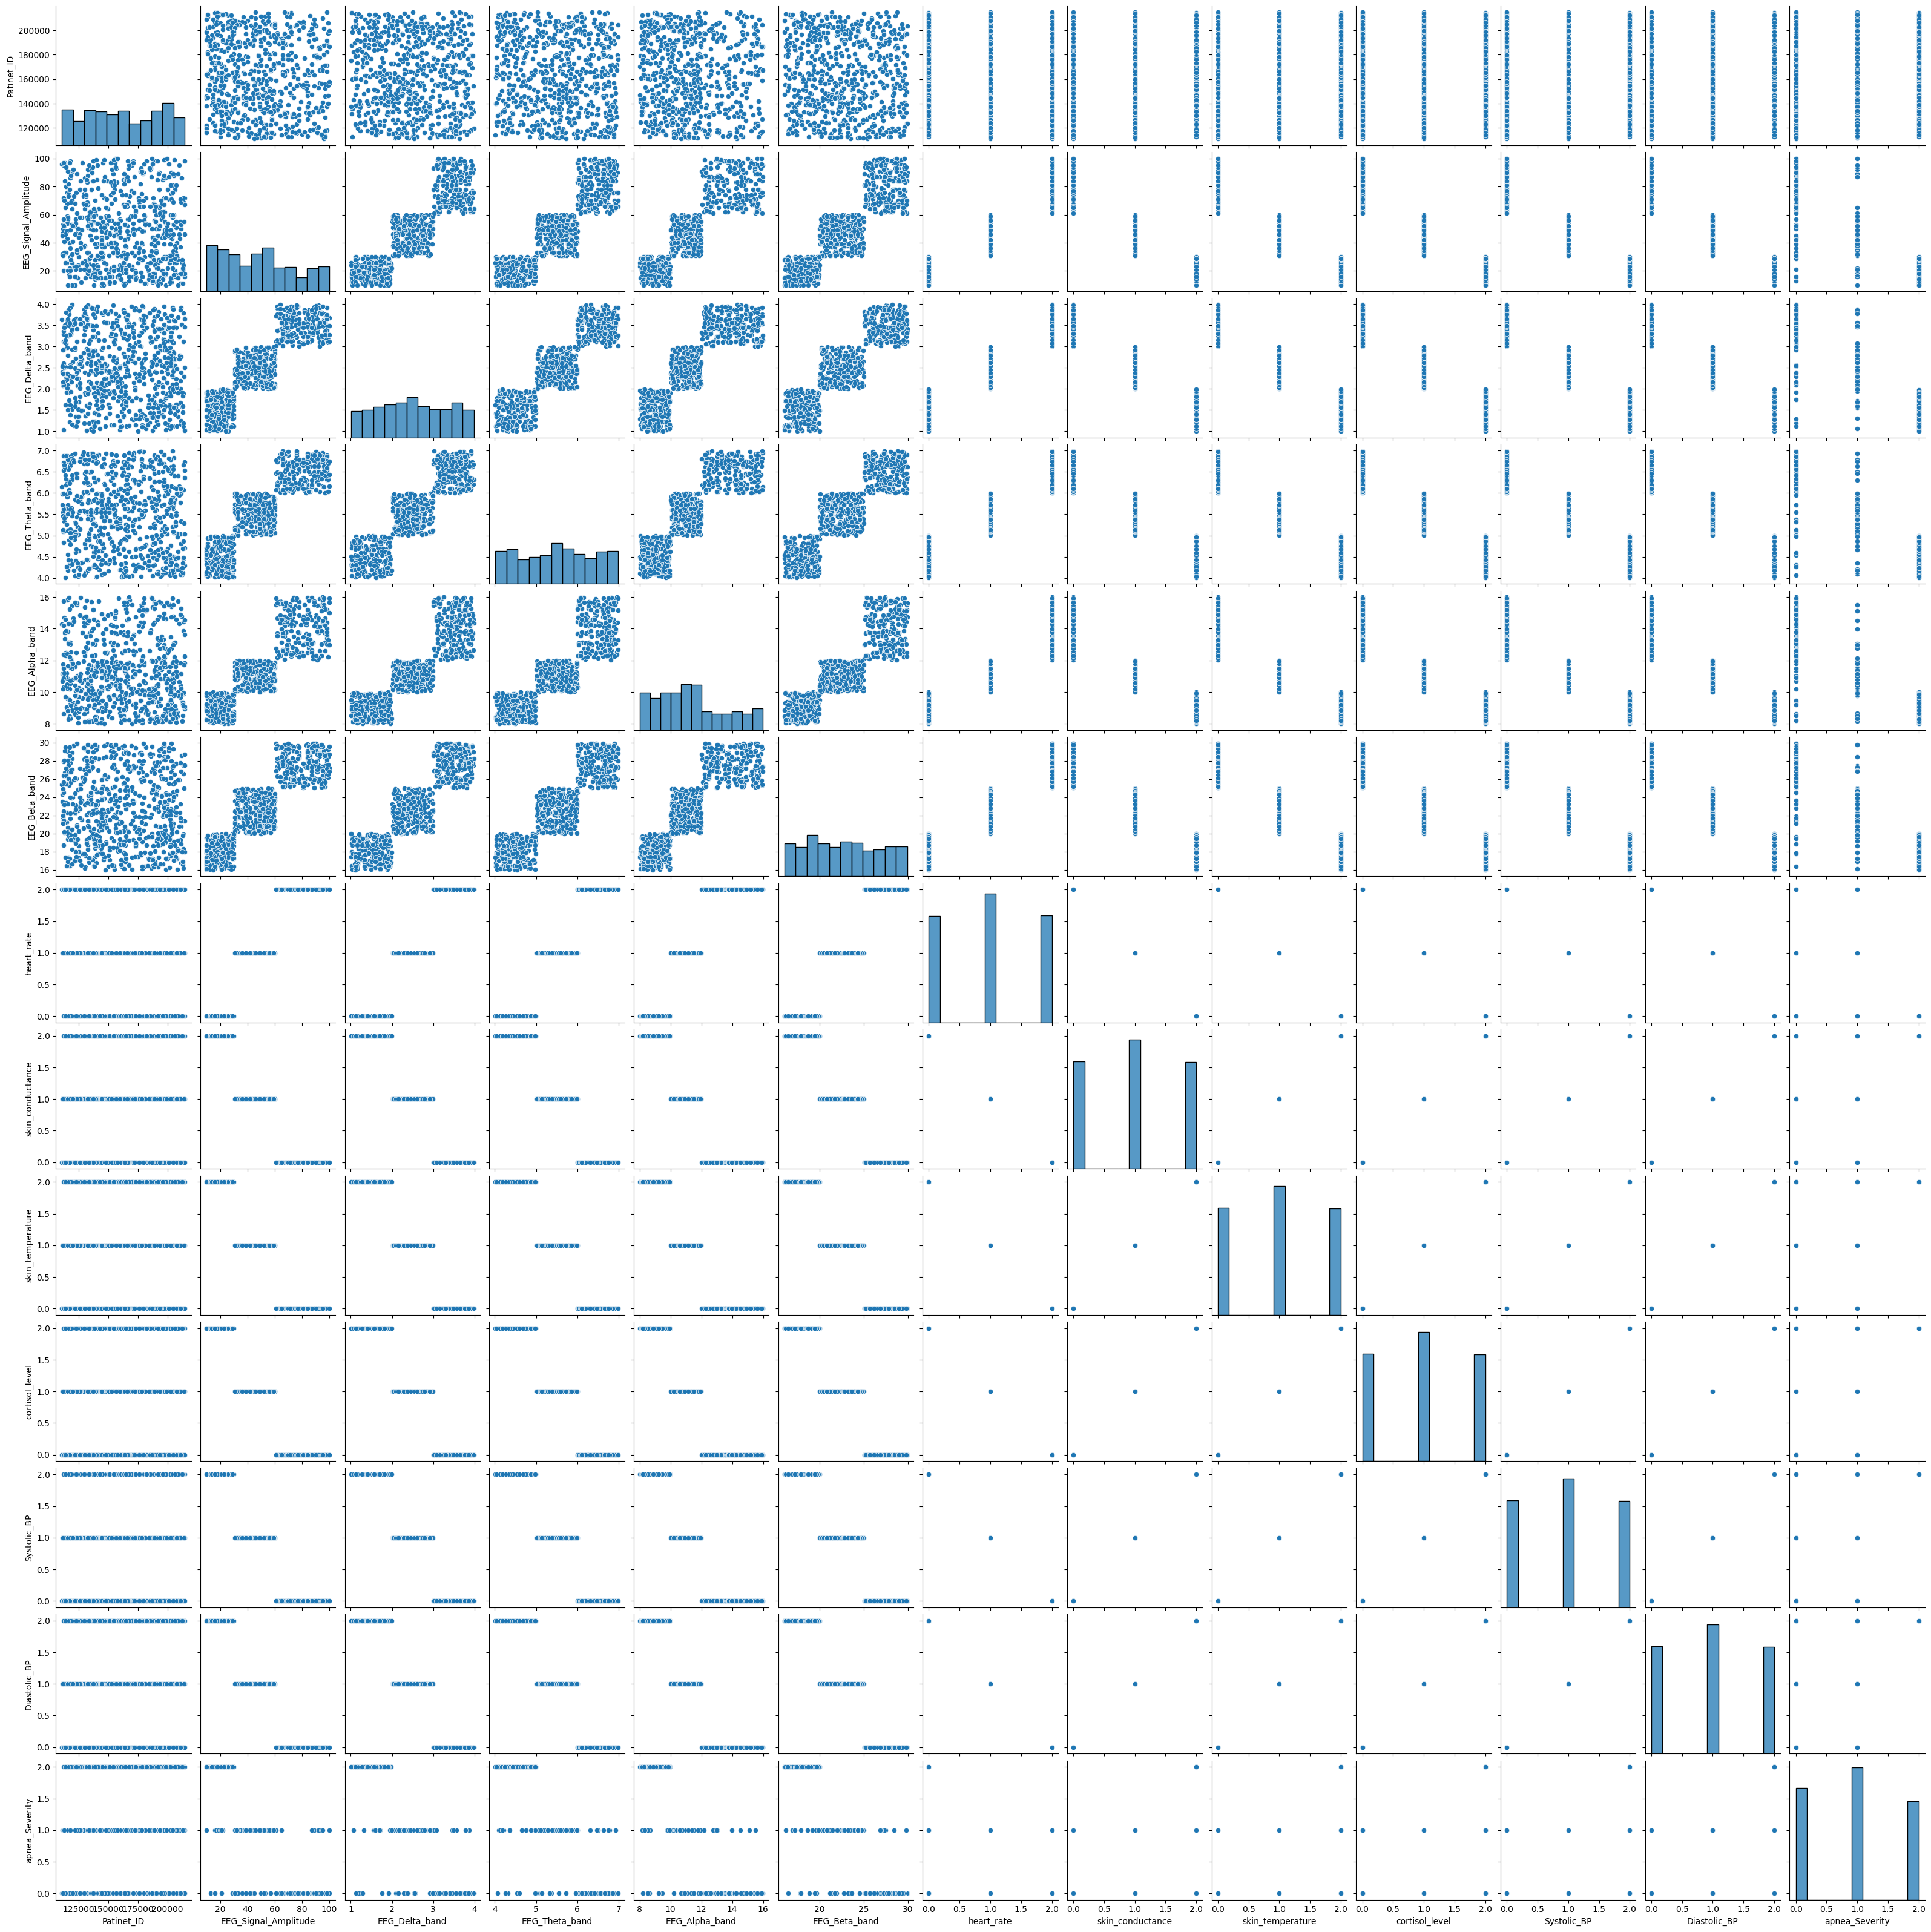

In [8]:
sns.pairplot(df)
plt.show()

/tmp/ipykernel_1086361/1017774568.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                      Patinet_ID  EEG_Signal_Amplitude  EEG_Delta_band  \
Patinet_ID              1.000000             -0.059376       -0.062370   
EEG_Signal_Amplitude   -0.059376              1.000000        0.882041   
EEG_Delta_band         -0.062370              0.882041        1.000000   
EEG_Theta_band         -0.077095              0.883475        0.890056   
EEG_Alpha_band         -0.034737              0.862325        0.867287   
EEG_Beta_band          -0.054704              0.876931        0.889012   
heart_rate             -0.064903              0.931941        0.942607   
skin_conductance        0.064903             -0.931941       -0.942607   
skin_temperature        0.064903             -0.931941       -0.942607   
cortisol_level          0.064903             -0.931941       -0.942607   
Systolic_BP             0.064903             -0.931941       -0.942607   
Diastolic_BP            0.064903             -0.931941       -0.942607   
apnea_Severity          0.068827      

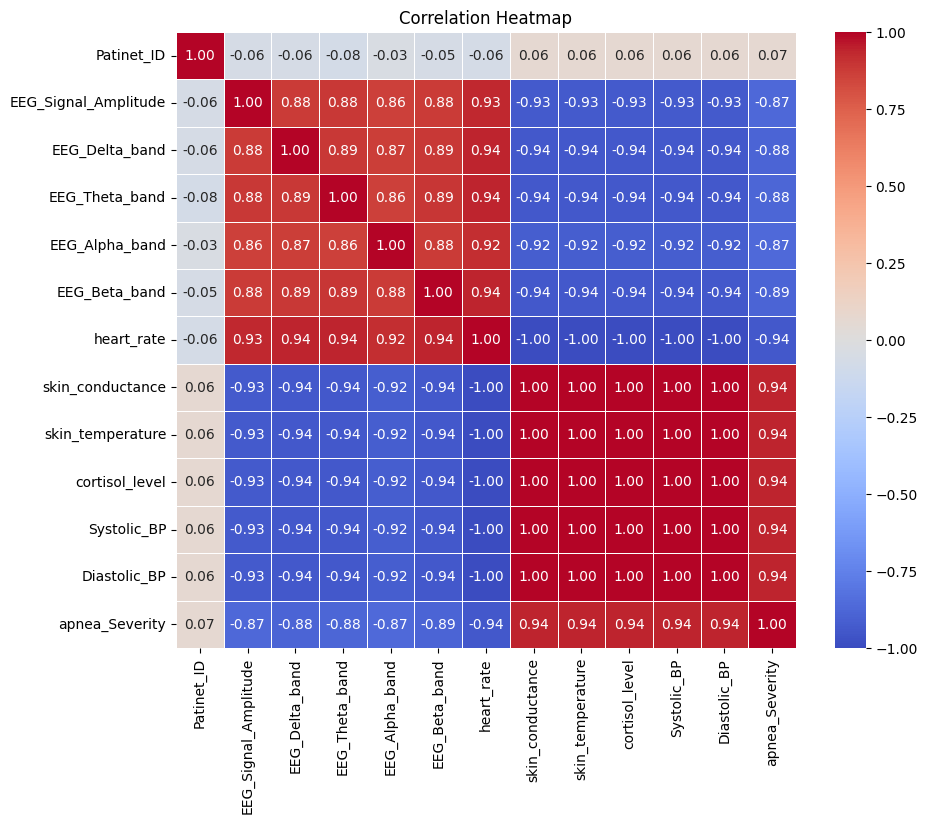

In [9]:
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
data = df[["EEG_Signal_Amplitude", "EEG_Delta_band", "EEG_Theta_band", "EEG_Alpha_band", "EEG_Beta_band", "heart_rate",
           "skin_conductance", "skin_temperature", "cortisol_level", "Systolic_BP", "Diastolic_BP", "apnea_Severity"]].to_numpy()

In [11]:
data 

array([[ 56.    ,   2.4786,   5.5748, ...,   1.    ,   1.    ,   1.    ],
       [ 97.    ,   3.2531,   6.4658, ...,   0.    ,   0.    ,   0.    ],
       [ 83.    ,   3.6325,   6.0053, ...,   0.    ,   0.    ,   0.    ],
       ...,
       [ 36.    ,   2.3799,   5.324 , ...,   1.    ,   1.    ,   0.    ],
       [ 59.    ,   2.6147,   5.3841, ...,   1.    ,   1.    ,   1.    ],
       [100.    ,   3.4924,   6.7524, ...,   0.    ,   0.    ,   1.    ]])

In [12]:
inputs = data[:, :-1]
inputs

array([[ 56.    ,   2.4786,   5.5748, ...,   1.    ,   1.    ,   1.    ],
       [ 97.    ,   3.2531,   6.4658, ...,   0.    ,   0.    ,   0.    ],
       [ 83.    ,   3.6325,   6.0053, ...,   0.    ,   0.    ,   0.    ],
       ...,
       [ 36.    ,   2.3799,   5.324 , ...,   1.    ,   1.    ,   1.    ],
       [ 59.    ,   2.6147,   5.3841, ...,   1.    ,   1.    ,   1.    ],
       [100.    ,   3.4924,   6.7524, ...,   0.    ,   0.    ,   0.    ]])

In [13]:
outputs = data[:, -1]
outputs

array([1., 0., 0., 1., 2., 0., 0., 1., 1., 0., 2., 1., 2., 1., 0., 1., 1.,
       0., 1., 0., 2., 0., 0., 0., 0., 1., 0., 0., 2., 2., 1., 0., 0., 1.,
       0., 1., 1., 2., 1., 0., 1., 0., 2., 1., 2., 2., 1., 2., 2., 2., 2.,
       2., 2., 1., 1., 2., 2., 2., 1., 1., 0., 2., 1., 0., 1., 1., 2., 1.,
       1., 2., 1., 0., 2., 1., 2., 2., 2., 0., 1., 0., 1., 0., 2., 1., 1.,
       0., 1., 0., 2., 1., 1., 0., 2., 2., 0., 2., 0., 2., 0., 2., 1., 2.,
       0., 1., 1., 2., 2., 2., 1., 1., 0., 0., 1., 2., 2., 0., 0., 2., 2.,
       1., 0., 0., 0., 2., 2., 0., 0., 1., 2., 1., 2., 1., 0., 1., 2., 2.,
       2., 1., 2., 0., 2., 2., 2., 1., 2., 1., 2., 2., 2., 0., 1., 0., 1.,
       2., 2., 1., 2., 0., 0., 0., 0., 1., 0., 2., 0., 1., 0., 2., 0., 1.,
       1., 1., 2., 0., 2., 1., 2., 0., 2., 0., 2., 2., 2., 0., 1., 0., 1.,
       2., 2., 0., 0., 0., 1., 0., 0., 2., 0., 0., 1., 0., 1., 2., 1., 0.,
       1., 2., 1., 1., 2., 1., 0., 1., 2., 0., 2., 2., 2., 1., 0., 0., 2.,
       2., 0., 0., 0., 1.

In [14]:
training_inputs = inputs[:300]
training_outputs = outputs[:300]

In [15]:
testing_inputs = inputs[300:]
testing_outputs = outputs[300:]

In [38]:
rbfkernel = 1.0 * RBF(1.0)
classifier = GaussianProcessClassifier(kernel=rbfkernel)
classifier.fit(training_inputs, training_outputs)
predictions = classifier.predict(testing_inputs)
accuracy = 100.0 * accuracy_score(testing_outputs, predictions)
print("The accuracy of RBF Classifier on testing data is: " + str(accuracy))

The accuracy of RBF Classifier on testing data is: 90.66666666666666


In [39]:
testSet = [[97, 3.2531, 6.4658, 13.1411, 28.3962, 2, 0, 0, 0, 0, 0]]
test = pd.DataFrame(testSet)
predictions = classifier.predict(test)
print('RBF prediction on the first test set is:', predictions)

RBF prediction on the first test set is: [0.]


In [32]:
# Print out the predictions
print('Model output:', predictions)

Model output: [0.]


In [18]:
# Mapping dictionary
severity_mapping = {0: 'Low_Severity', 1: 'Medium_Severity', 2: 'High_Severity'}

# Convert predictions to original values
predicted_severity = np.vectorize(severity_mapping.get)(predictions)

# Display the predicted severity
print('QDA prediction on the third test set is:', predicted_severity)

QDA prediction on the third test set is: ['Low_Severity']


In [19]:
testSet = [[58, 2.9477, 5.5462, 10.3739, 22.0865, 1, 1, 1, 1, 1, 1]]
test = pd.DataFrame(testSet)
predictions = classifier.predict(test)
print('QDA prediction on the second test set is:', predictions)

QDA prediction on the second test set is: [1.]


In [20]:
# Mapping dictionary
severity_mapping = {0: 'Low_Severity', 1: 'Medium_Severity', 2: 'High_Severity'}

# Convert predictions to original values
predicted_severity = np.vectorize(severity_mapping.get)(predictions)

# Display the predicted severity
print('QDA prediction on the third test set is:', predicted_severity)

QDA prediction on the third test set is: ['Medium_Severity']


In [21]:
testSet = [[50, 2.9366, 3.3574, 8.9079, 20.7077, 1, 1, 1, 1, 1, 1]]
test = pd.DataFrame(testSet)
predictions = classifier.predict(test)
print('QDA prediction on the third test set is:', predictions)

QDA prediction on the third test set is: [1.]


In [22]:
# Mapping dictionary
severity_mapping = {0: 'Low_Severity', 1: 'Medium_Severity', 2: 'High_Severity'}

# Convert predictions to original values
predicted_severity = np.vectorize(severity_mapping.get)(predictions)

# Display the predicted severity
print('QDA prediction on the third test set is:', predicted_severity)

QDA prediction on the third test set is: ['Medium_Severity']
